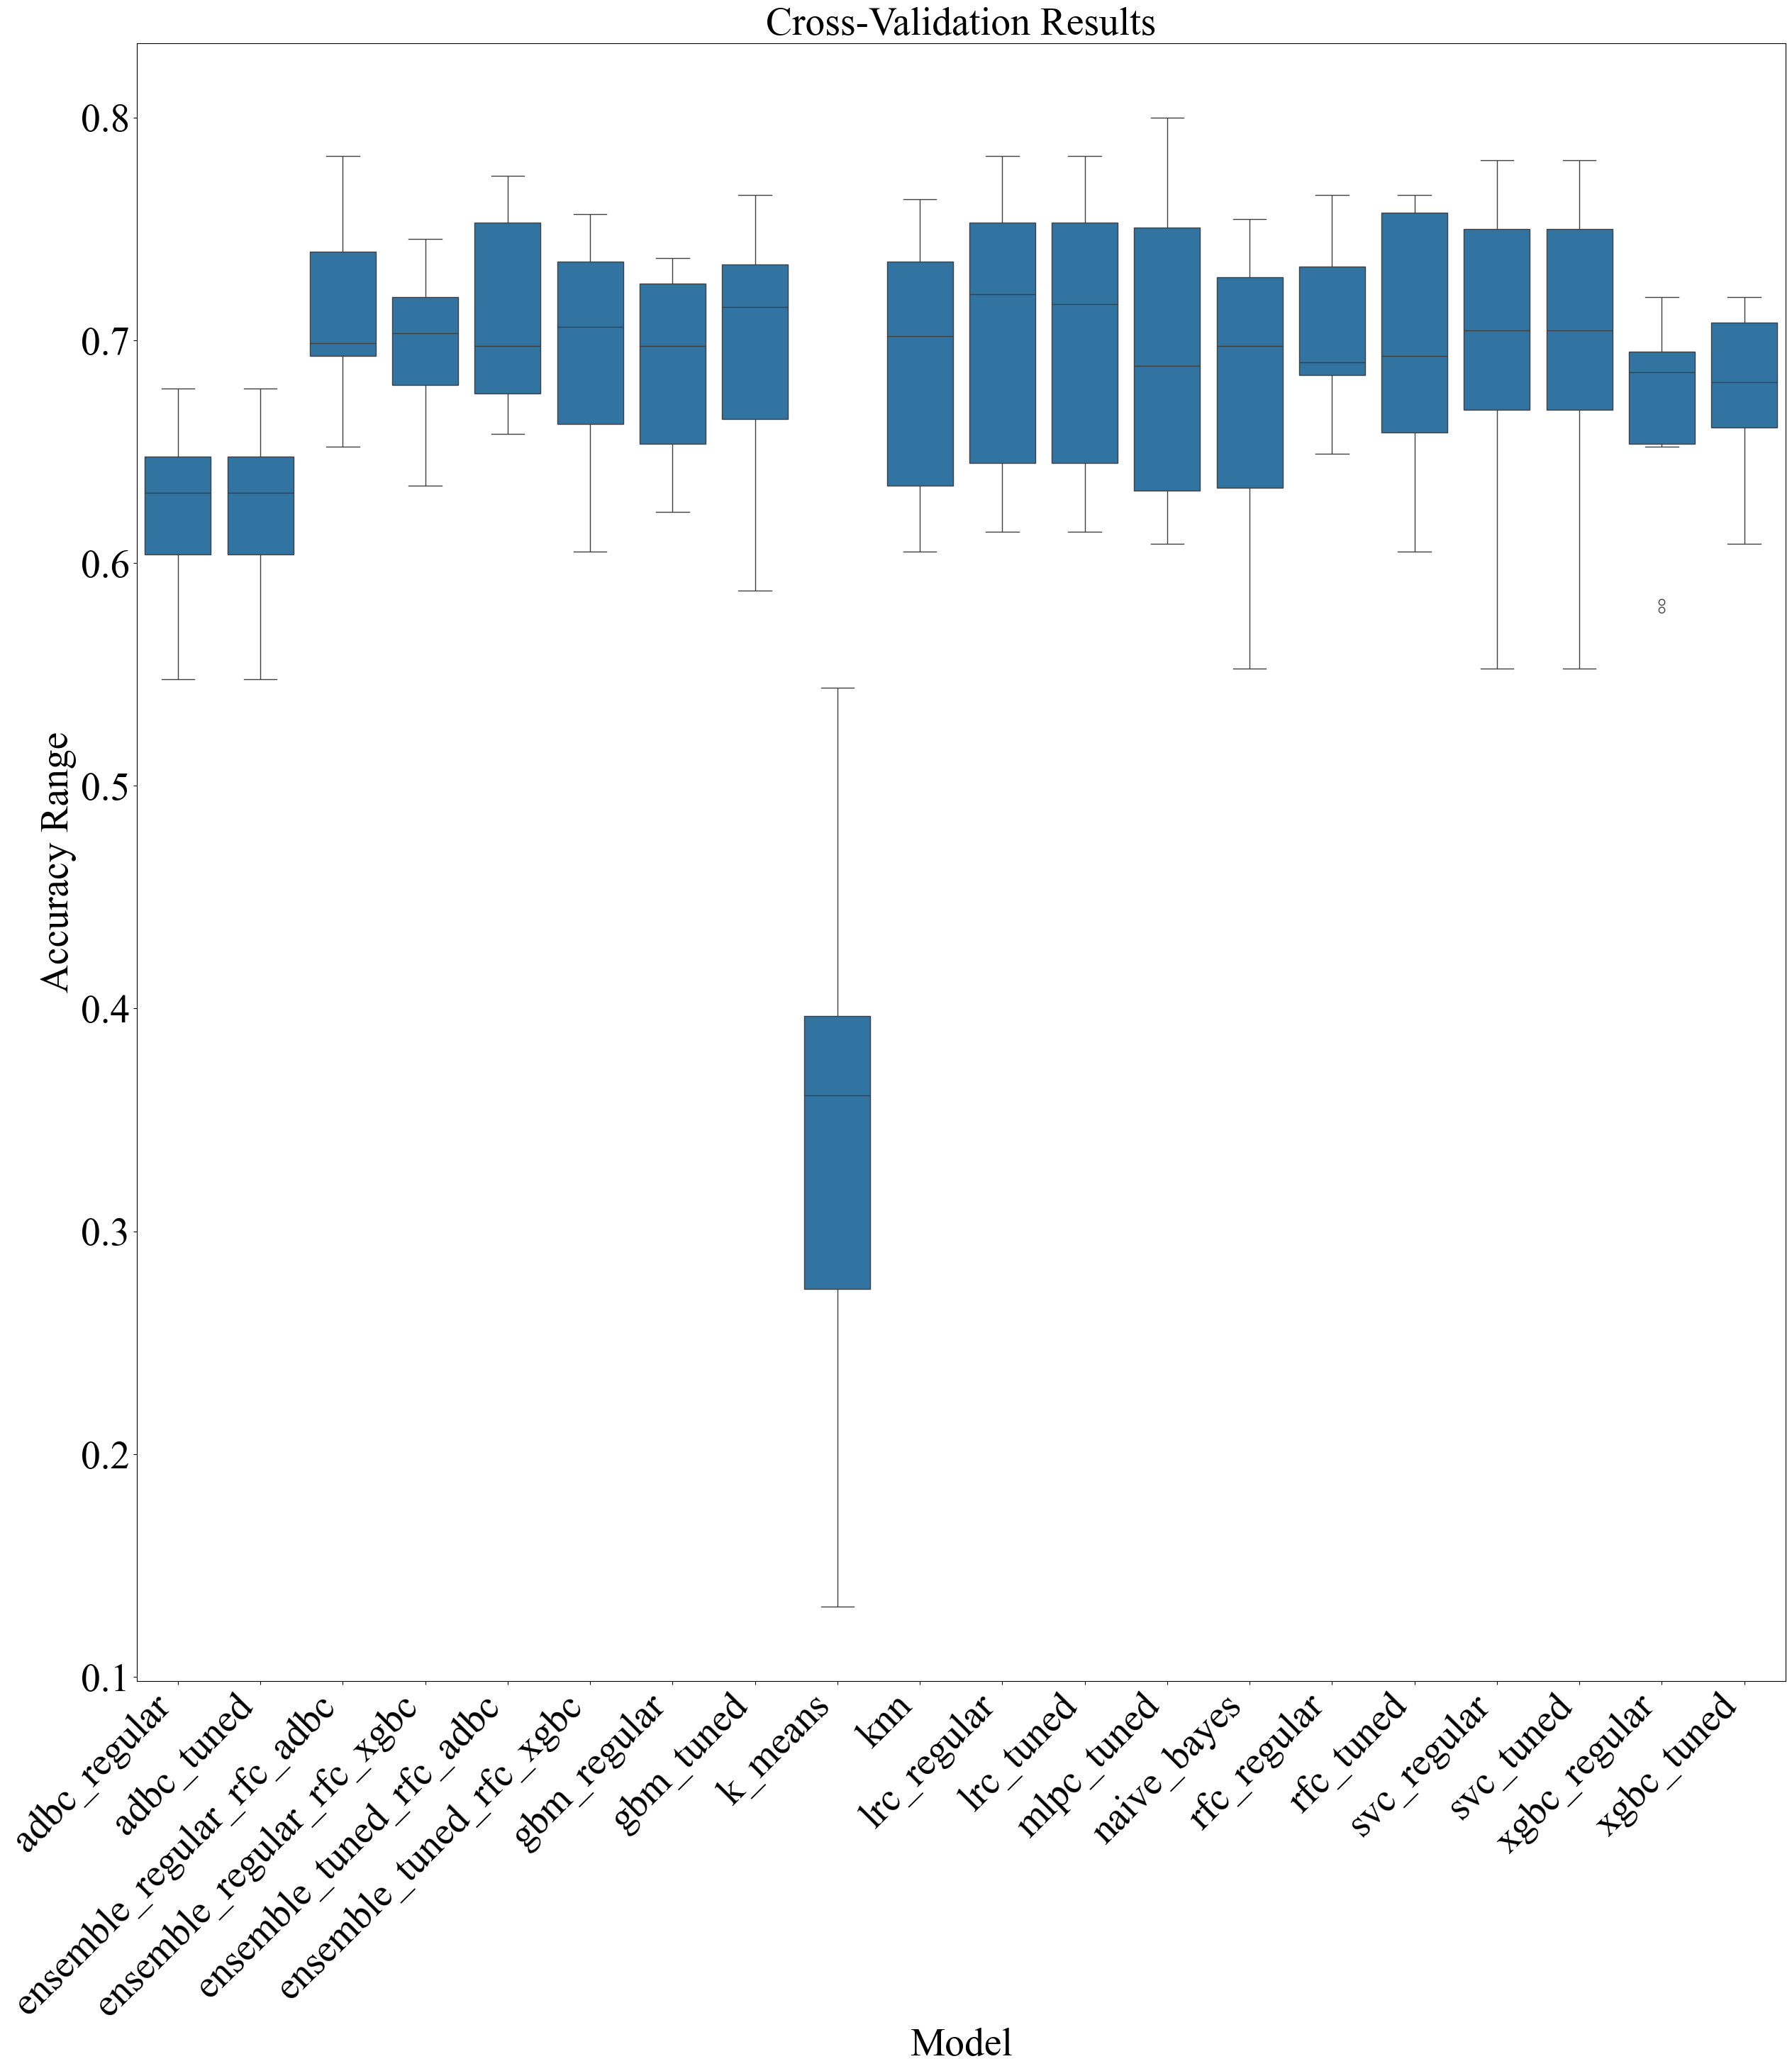

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
plt.rcParams['font.family'] = 'Times New Roman'
data = {
    'adbc_regular': [0.62608696,0.67826087,0.64347826,0.54782609,0.63157895,0.63157895,0.66666667,0.57894737,0.64912281,0.59649123],
    'adbc_tuned': [0.62608696,0.67826087,0.64347826,0.54782609,0.63157895,0.63157895,0.66666667,0.57894737,0.64912281,0.59649123],
    'ensemble_regular_rfc_adbc': [0.70434783,0.7826087,0.72173913,0.65217391,0.69298246,0.75438596,0.74561404,0.68421053,0.69298246,0.69298246],
    'ensemble_regular_rfc_xgbc': [0.67826087,0.73043478,0.71304348,0.63478261,0.69298246,0.74561404,0.71929825,0.64035088,0.68421053,0.71929825],
    'ensemble_tuned_rfc_adbc': [0.67826087,0.77391304,0.74782609,0.66086957,0.71052632,0.75438596,0.75438596,0.68421053,0.6754386,0.65789474],
    'ensemble_tuned_rfc_xgbc': [0.62608696,0.73043478,0.75652174,0.66086957,0.70175439,0.73684211,0.75438596,0.60526316,0.66666667,0.71052632],    
    'gbm_regular': [0.62608696,0.73043478,0.73043478,0.65217391,0.71052632,0.73684211,0.71052632,0.62280702,0.68421053,0.65789474],
    'gbm_tuned': [0.66086957,0.73913043,0.76521739,0.64347826,0.71929825,0.76315789,0.71929825,0.5877193,0.6754386,0.71052632],
    'k_means': [0.34782609,0.4,0.37391304,0.46956522,0.38596491,0.54385965,0.13157895,0.25438596,0.33333333,0.21929825],
    'knn': [0.6173913,0.73043478,0.75652174,0.64347826,0.69298246,0.76315789,0.73684211,0.60526316,0.63157895,0.71052632],
    'lrc_regular': [0.63478261,0.74782609,0.7826087,0.72173913,0.6754386,0.77192982,0.75438596,0.61403509,0.63157895,0.71929825],
    'lrc_tuned': [0.63478261,0.74782609,0.7826087,0.71304348,0.6754386,0.77192982,0.75438596,0.61403509,0.63157895,0.71929825],
    'mlpc_tuned': [0.60869565,0.71304348,0.8,0.66086957,0.6754386,0.76315789,0.76315789,0.62280702,0.62280702,0.70175439],
    'naive_bayes': [0.60869565,0.72173913,0.74782609,0.73043478,0.66666667,0.70175439,0.75438596,0.55263158,0.62280702,0.69298246],
    'rfc_regular': [0.68695652,0.76521739,0.72173913,0.66086957,0.68421053,0.73684211,0.74561404,0.64912281,0.68421053,0.69298246],
    'rfc_tuned': [0.64347826,0.73913043,0.76521739,0.66086957,0.69298246,0.76315789,0.76315789,0.60526316,0.65789474,0.69298246],
    'svc_regular': [0.6173913,0.73043478,0.76521739,0.67826087,0.6754386,0.78070175,0.75438596,0.55263158,0.66666667,0.73684211],
    'svc_tuned': [0.6173913,0.73043478,0.76521739,0.67826087,0.6754386,0.78070175,0.75438596,0.55263158,0.66666667,0.73684211],
    'xgbc_regular': [0.65217391,0.69565217,0.68695652,0.5826087,0.69298246,0.71929825,0.65789474,0.57894737,0.68421053,0.71052632],
    'xgbc_tuned': [0.68695652,0.66956522,0.71304348,0.60869565,0.69298246,0.71929825,0.65789474,0.62280702,0.6754386,0.71929825]
    
}

df = pd.DataFrame(data)

# Melt the DataFrame to a long format
df_melted = df.melt(var_name='Model', value_name='Accuracy')

# Create a boxplot
plt.figure(figsize=(30, 30))
sns.boxplot(x='Model', y='Accuracy', data=df_melted, color='tab:blue')
plt.title('Cross-Validation Results', fontsize=40)
plt.xlabel('Model', fontsize=40)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy Range', fontsize=40)
# plt.yscale('log')
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.savefig('cross_validation_results.png', dpi=300)

# Calculate highest, lowest, and average values for each column
column_stats = df.describe().transpose()[['min', 'mean', 'max']]

with open('cross_validation_results.txt', 'w') as file:
    sys.stdout = file
    # Print the results for each column
    for column in column_stats.index:
        highest_value = column_stats.loc[column, 'max']
        lowest_value = column_stats.loc[column, 'min']
        average_value = column_stats.loc[column, 'mean']
        
        print(f'Column: {column}')
        print(f'Highest Value: {highest_value:.4f}')
        print(f'Lowest Value: {lowest_value:.4f}')
        print(f'Average Value: {average_value:.4f}\n')
    # Reset stdout back to the console
    sys.stdout = sys.__stdout__